<a href="https://colab.research.google.com/github/subin100/DataVisualization/blob/main/Master.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Subin Manandhar
##Data Visualization (CPSMA 4313)
##Instructor: Dr Nicholas Jacob
##Recreating the Masters

I am going to recreate the graph given below

![Premier league](https://www.thesun.co.uk/wp-content/uploads/2022/02/jb-graphic-pl-mangers-salaries-v2-1.jpg)

##Graphical excellence
The visualizalization is simple and easy to follow. The graph is simple yet there is as many information needed as readers are trying to get. For example, by just looking at the graph you can predict pep guardiola is highest paid manager in the league because the color provided for this set of data is different from the rest. It gives readers many information as possible in a glance like you can predict the clubs the manager represent because it provides picture on the left of it.. The information provided in the graph is very accurate and upto date. For all these reasons this graph is graphically excellent.

Lets import all the resources we required before we begin the project.

In [ ]:
import requests
import pandas as pd
import seaborn as sns
from bs4 import BeautifulSoup
import numpy as np
import matplotlib.image as mpimg
import matplotlib.pyplot as plt


In [ ]:
r = requests.get('https://www.sportingfree.com/football/premier-league-managers-salaries/')
html_contents = r.text
html_soup = BeautifulSoup(html_contents,"lxml")
len(html_soup.find_all('table'))

1

In [ ]:
html_soup.title

<title>Premier League Managers Salaries 2022-22: Highest Paid Manager in EPL</title>

So we got the table we needed for this table.
But we have to convert (Base salary) to integer to work on the table because it is in the string format.

In [ ]:
tables = html_soup.find_all('table')

df = pd.read_html(str(tables))[0]
df1 = pd.read_html(str(tables))[0]
df

,Manager,Base Salary,Weekly Wage,Club,Contract
0,Pep Guardiola,£20 million,"£417,500",Manchester City,2021
1,Jürgen Klopp,£15 million,"£313,500",Liverpool,2024
2,José Mourinho,£15 million,"£313,000",Tottenham,2023
3,Carlo Ancelotti,£11 million,"£230,000",Everton,2024
4,Frank Lampard,£8 million,"£166,850",Chelsea,2022
5,Marcelo Bielsa,£8 million,"£166,660",Leeds United,2022
6,Ole Gunnar Solskjær,£7.8 million,"£160,000",Manchester United,2022
7,Mikel Arteta,£5 million,"£105,000",Arsenal,2023
8,Brendan Rodgers,£5 million,"£105,000",Leicester City,2025
9,Roy Hodgson,£4.5 million,"£93,750",Crystal Palace,2021


Checking data types of all the columns

In [ ]:
df.columns

Index(['Manager', 'Base Salary', 'Weekly Wage', 'Club', 'Contract'], dtype='object')

Now lets remove £ and ',' from base salary and then change the data type to float.

In [ ]:
df1['Base Salary'] = df1['Base Salary'].str.replace('£','').str.replace(',','').str.replace('million','')
df1['Base Salary'] = pd.to_numeric(df1['Base Salary'])

df1

,Manager,Base Salary,Weekly Wage,Club,Contract
0,Pep Guardiola,20.00,"£417,500",Manchester City,2021
1,Jürgen Klopp,15.00,"£313,500",Liverpool,2024
2,José Mourinho,15.00,"£313,000",Tottenham,2023
3,Carlo Ancelotti,11.00,"£230,000",Everton,2024
4,Frank Lampard,8.00,"£166,850",Chelsea,2022
5,Marcelo Bielsa,8.00,"£166,660",Leeds United,2022
6,Ole Gunnar Solskjær,7.80,"£160,000",Manchester United,2022
7,Mikel Arteta,5.00,"£105,000",Arsenal,2023
8,Brendan Rodgers,5.00,"£105,000",Leicester City,2025
9,Roy Hodgson,4.50,"£93,750",Crystal Palace,2021


In [ ]:
df1.dtypes

Manager         object
Base Salary    float64
Weekly Wage     object
Club            object
Contract         int64
dtype: object

It worked as we can see data type of Weekly wage is converted to int

I am going to drop column 18 and 19 because it is creating lots of problems when plotted in graph because their base salary is not in millions.
I might make it work for my final project though.

In [ ]:
df1 = df1.drop([18,19])

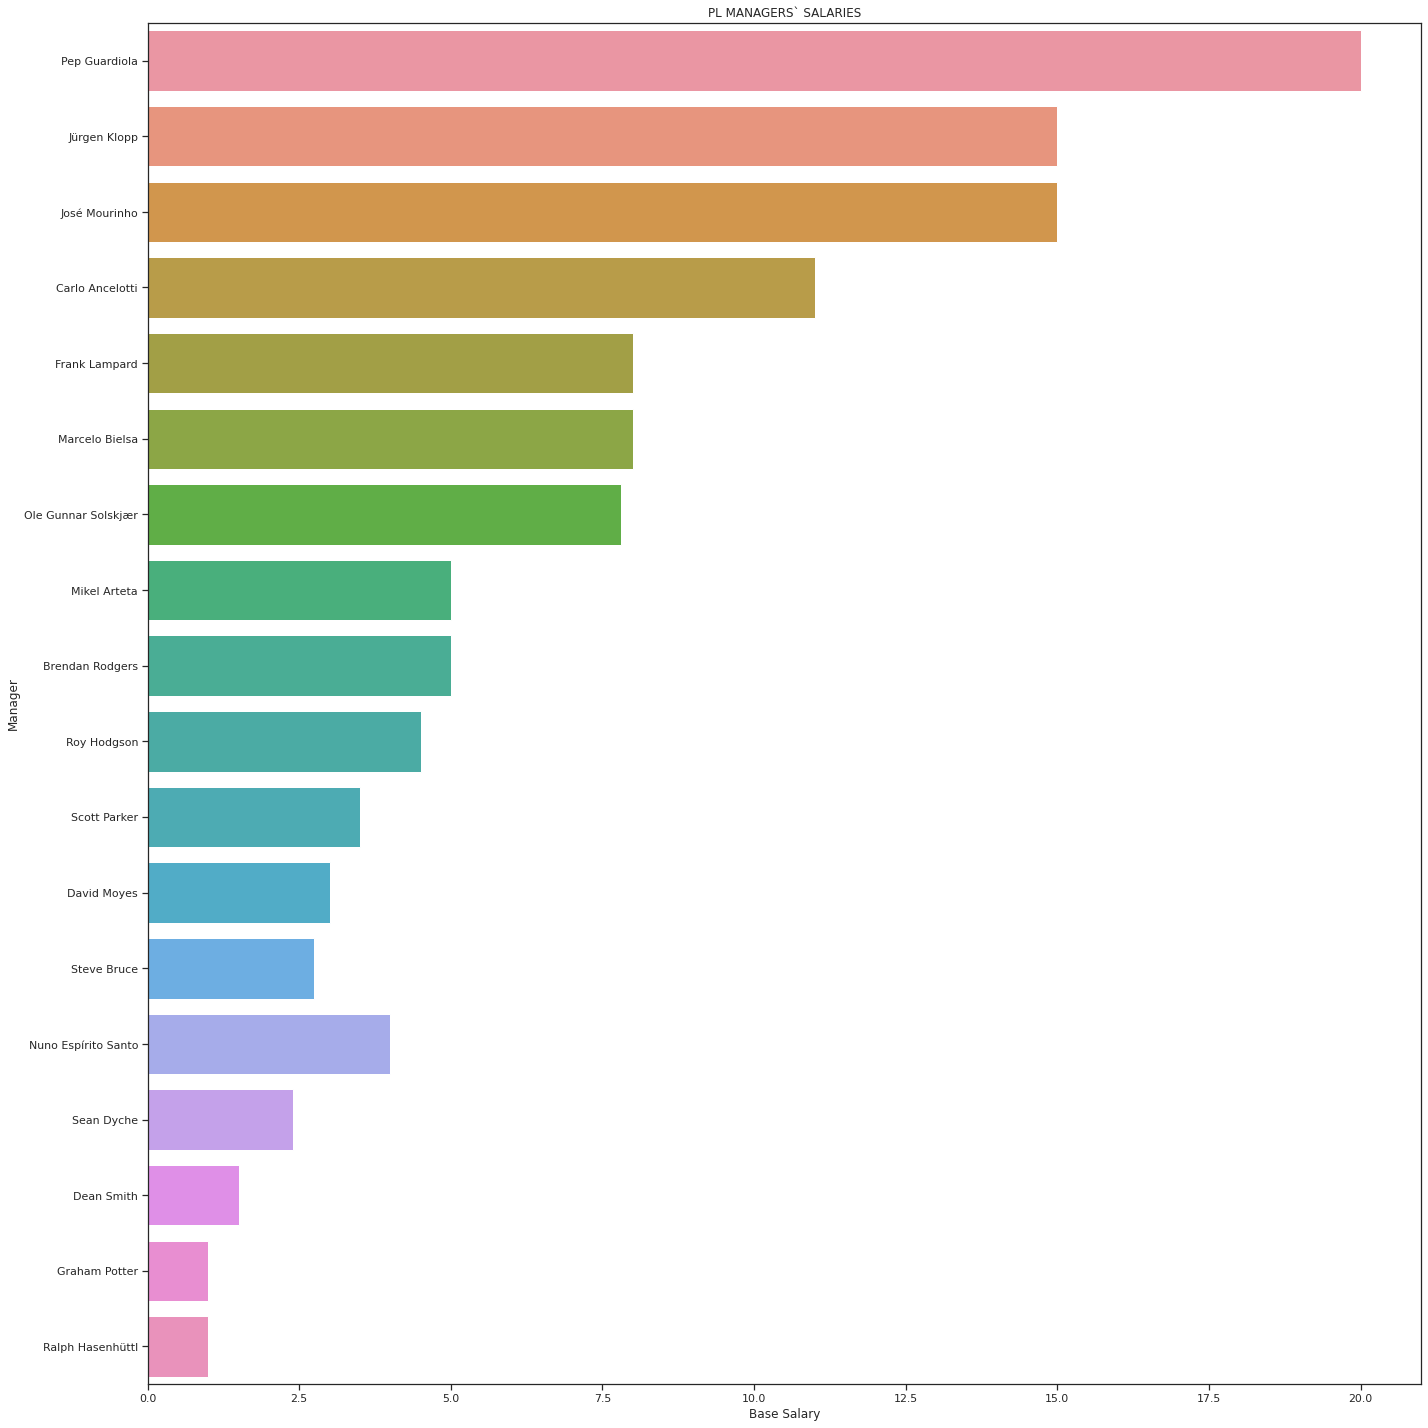

In [ ]:
ax = sns.barplot(data = df1 , x= 'Base Salary', y= "Manager", hue_order= None )
sns.set(rc={'figure.figsize':(20,20)})
ax.set_title('PL MANAGERS` SALARIES')
plt.show()

lets change the color of bars to purple as in the graph, we are recreating

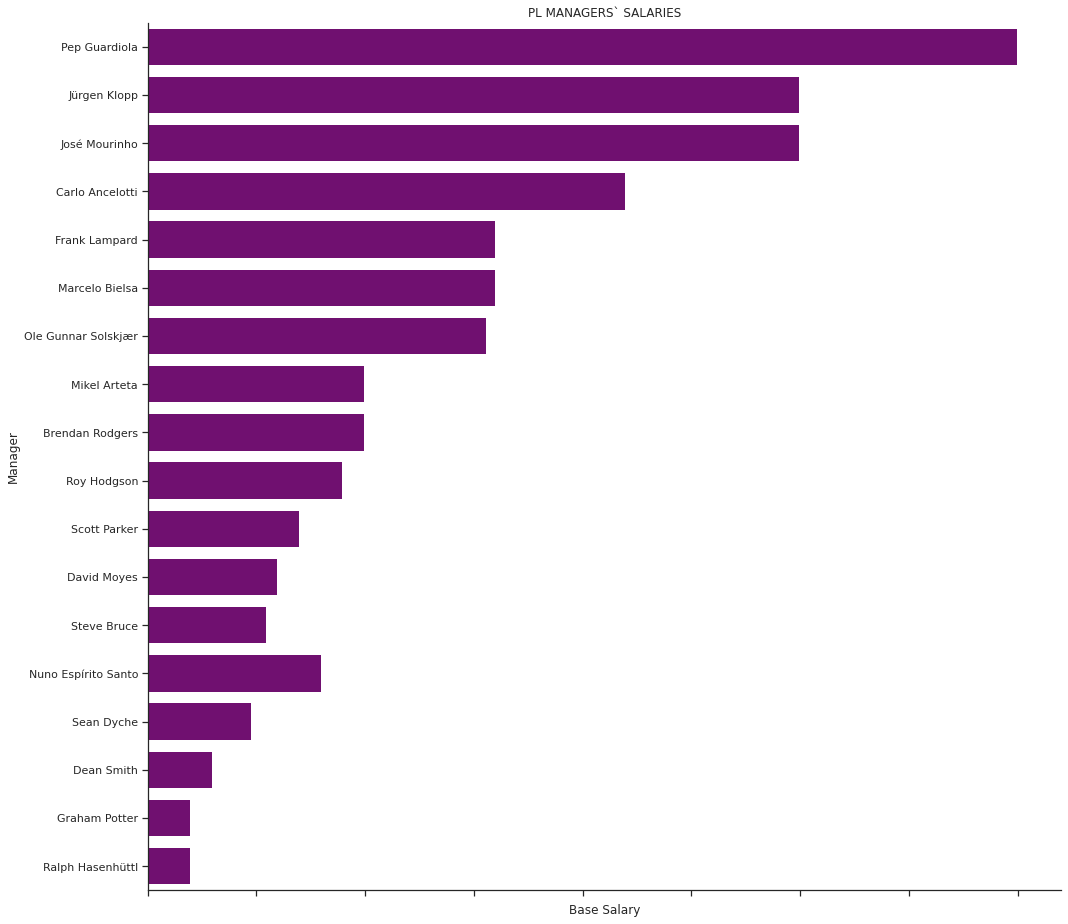

In [ ]:
plt.rcParams["figure.figsize"] = [15, 13]
plt.rcParams["figure.autolayout"] = True
sns.set_style('ticks')
ax = sns.barplot(data = df1, x = 'Base Salary', y= "Manager", color= 'purple', ci= None, linewidth= 2)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 60)
ax.set_title('PL MANAGERS` SALARIES')
sns.despine()
plt.show()

It worked perfectly well.
Now I am chnaging the color of pep Guardoiola's bar to gold 

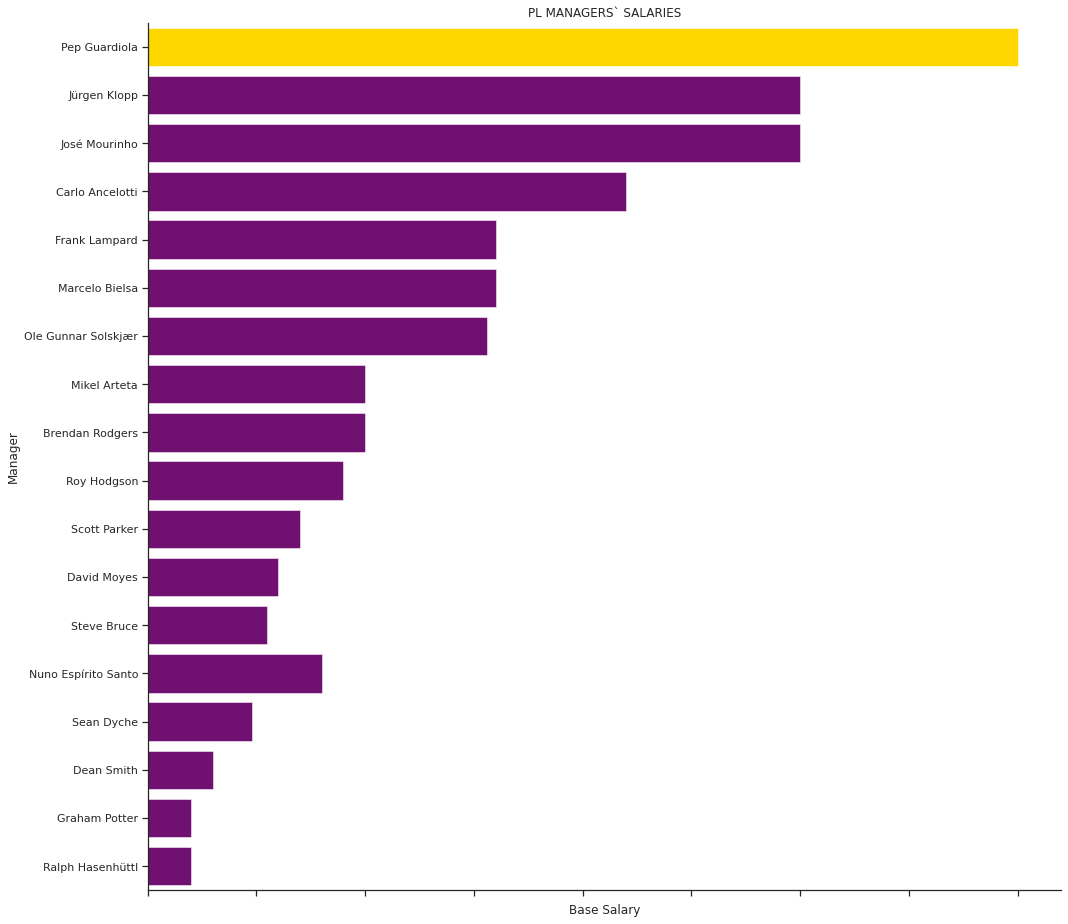

In [ ]:
from re import X
plt.rcParams["figure.figsize"] = [15, 13]
plt.rcParams["figure.autolayout"] = True
sns.set_style('ticks')
ax = sns.barplot(data = df1, x = 'Base Salary', y= "Manager", color= 'purple', ci= None, linewidth= 0.5)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 60)
ax.set_yticklabels(ax.get_yticklabels(),)
ax.set_title('PL MANAGERS` SALARIES')
patch_h = [patch.get_height() for patch in ax.patches]   
idx_tallest = np.argmax(patch_h)   
ax.patches[idx_tallest].set_facecolor('gold')  

sns.despine()
plt.show()

Name of managers is right align. To insert pictures of the left side we need names to be on the right. I am going to try to align manager name to the left.

Also I am removing x and y labels and labeling them in the top of the bar graph.

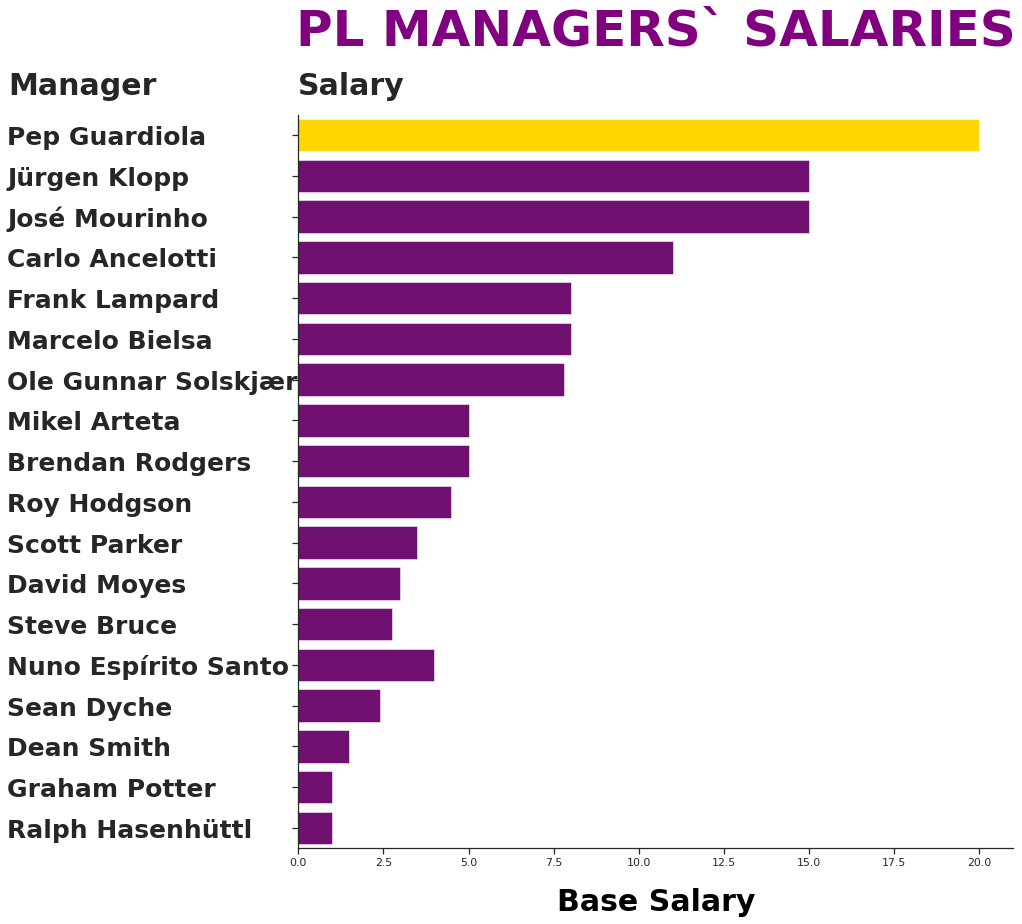

In [ ]:
from re import X

plt.rcParams["figure.figsize"] = [15, 13]
plt.rcParams["figure.autolayout"] = True
sns.set_style('ticks')
ax = sns.barplot(data = df1, x = 'Base Salary', y= "Manager", color= 'purple', ci= None, linewidth= 0.5)
ax.set_yticklabels(ax.get_yticklabels(), ha="left", rotation_mode = "anchor", fontweight = 'bold')
ax.tick_params(axis='y', which='major', pad=285)

ax.set_title('PL MANAGERS` SALARIES', size = float(50.0), fontweight = 'bold', color= 'purple', pad = 70)
plt.text(-8.5, -1, "Manager", size = float(30.0), fontweight = 'bold')
plt.text(0, -1, "Salary", size = float(30.0), fontweight = 'bold')
# ax.set_ylabel("Manager", size = float(30), fontweight = 'bold',  color= 'black',labelpad = 70, )
ax.set_ylabel('')

ax.set_xlabel("Base Salary", size = float(30), fontweight = 'bold',  color= 'black', labelpad = 20 )
patch_h = [patch.get_height() for patch in ax.patches]   
idx_tallest = np.argmax(patch_h)   
ax.patches[idx_tallest].set_facecolor('gold')
ax.yaxis.set_tick_params(labelsize=25) 
sns.despine()
plt.show()

It worked as I wanted So now I am moving on to the most difficult part which is inserting the picture on the left of the manager's name.

I mostly used pictures from freebiesupply.com for this process.

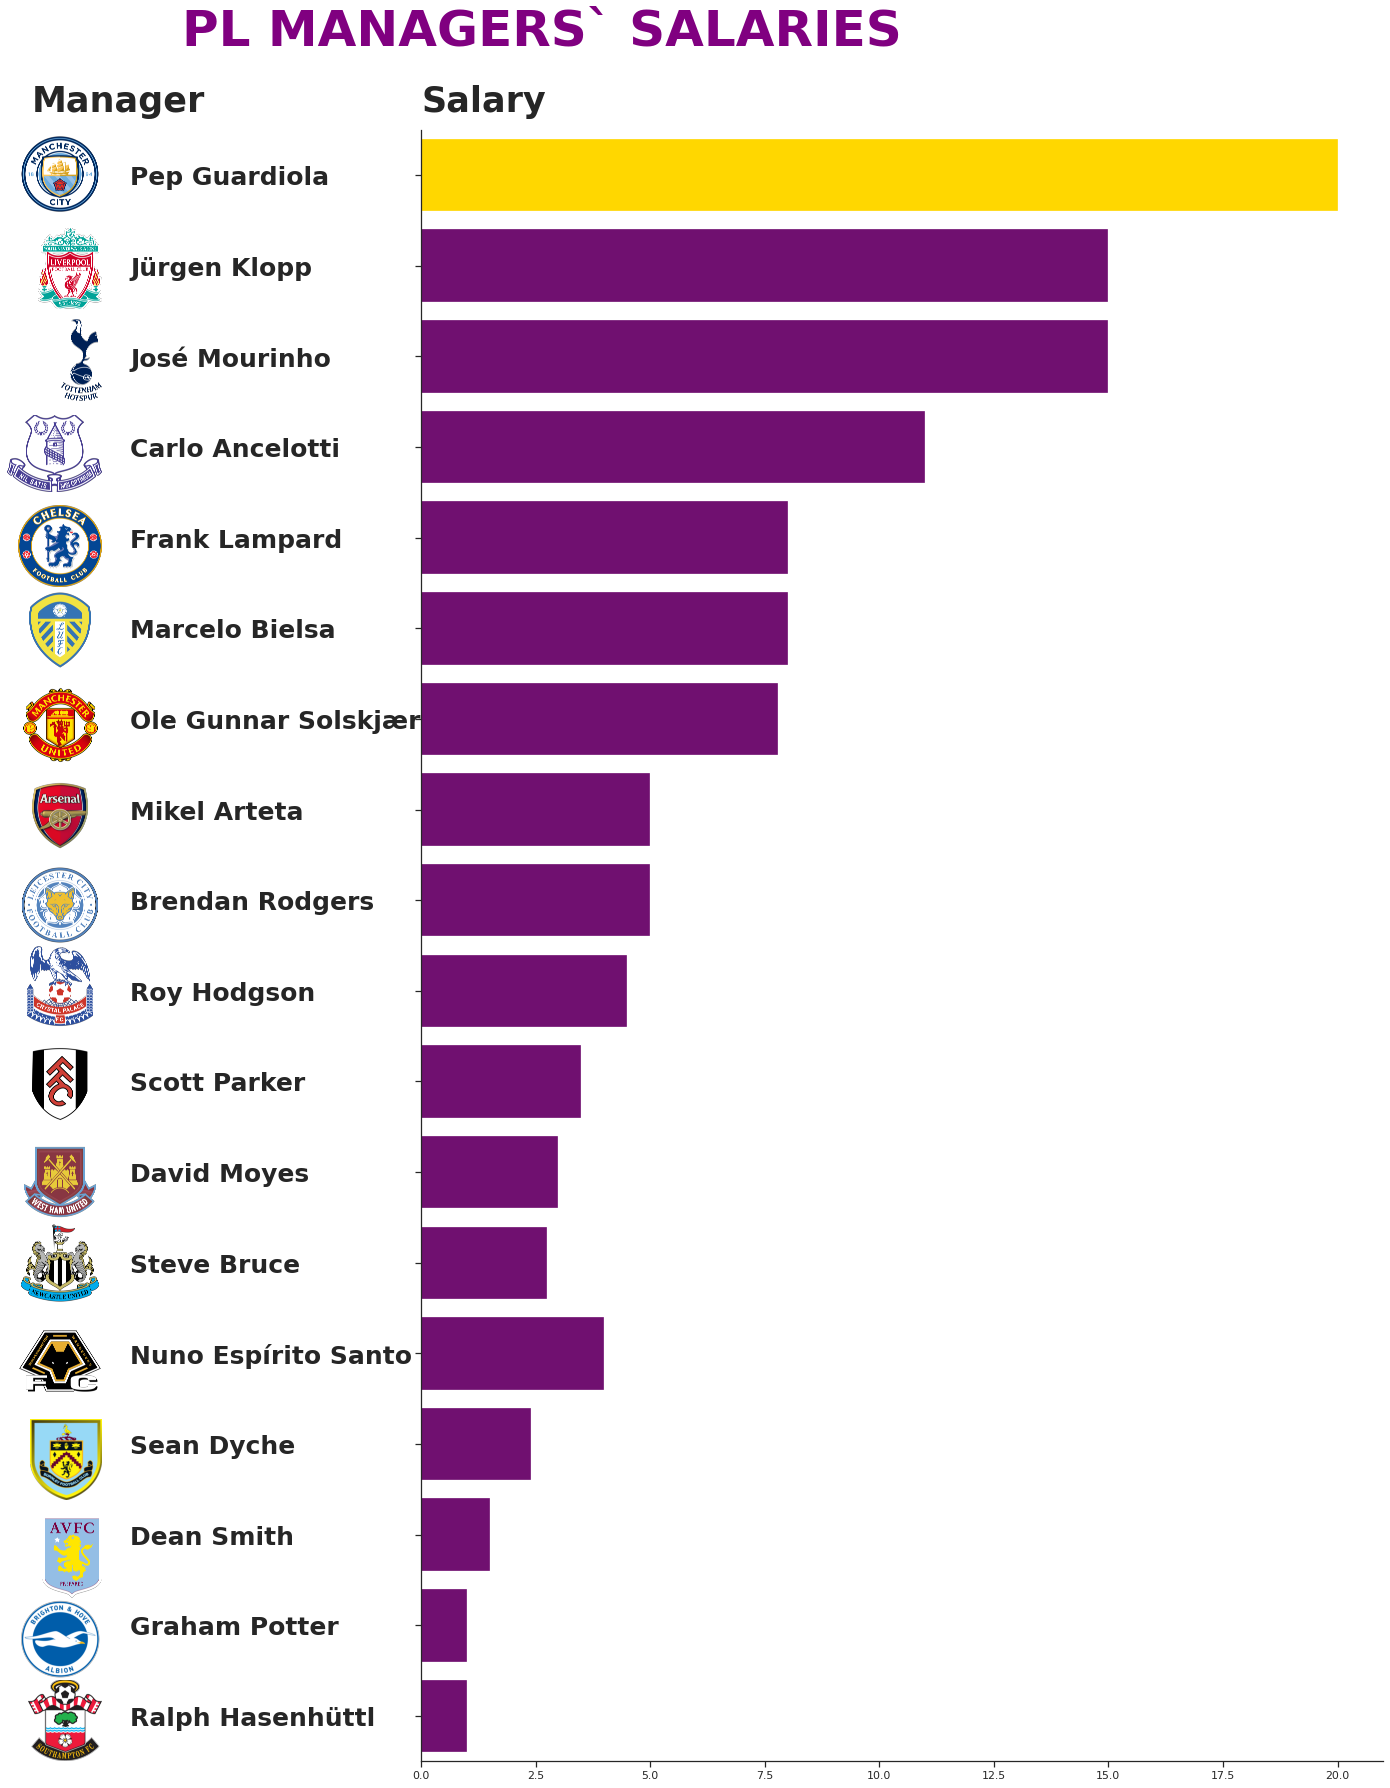

In [ ]:
from re import X

plt.rcParams["figure.figsize"] = [20, 25]
plt.rcParams["figure.autolayout"] = True
sns.set_style('ticks')
ax = sns.barplot(data = df1, x = 'Base Salary', y= "Manager", color= 'purple', linewidth= 0.3,)
ax.set_yticklabels(ax.get_yticklabels(), ha="left", rotation_mode = "anchor", fontweight = 'bold')
ax.tick_params(axis='y', which='major', pad=285)
ax.set_title('PL MANAGERS` SALARIES', size = float(50.0), fontweight = 'bold', ha='right', color= 'purple', pad = 85)
plt.text(-8.5, -0.7, "Manager", size = float(35.0), fontweight = 'bold')
plt.text(0, -0.7, "Salary", size = float(35.0), fontweight = 'bold')
ax.set_ylabel("")
ax.set_xlabel("" )
patch_h = [patch.get_height() for patch in ax.patches]   
idx_tallest = np.argmax(patch_h)   
ax.patches[idx_tallest].set_facecolor('gold')
ax.yaxis.set_tick_params(labelsize=25) 

arr_lena1 = plt.imread(f"https://cdn.freebiesupply.com/images/large/2x/manchester-city-logo-png-transparent.png")
axin = ax.inset_axes([-0.43,0.948,0.098,0.05], anchor='NE', zorder=1)    
axin.imshow(arr_lena1)
axin.axis('off')


arr_lena2 = plt.imread(f"https://cdn.freebiesupply.com/logos/large/2x/liverpool-fc-4-logo-png-transparent.png")
axin = ax.inset_axes([-0.43,0.890,0.098,0.05], anchor='NE', zorder=1)    
axin.imshow(arr_lena2)  
axin.axis('OFF')

arr_lena3 = plt.imread(f"https://cdn.freebiesupply.com/logos/large/2x/tottenham-hotspur-logo-png-transparent.png")
axin = ax.inset_axes([-0.43,0.834,0.098,0.05], anchor='NE', zorder=1)    
axin.imshow(arr_lena3)  
axin.axis('OFF')

arr_lena4 = plt.imread(f"https://cdn.freebiesupply.com/logos/large/2x/chelsea-fc-2-logo-png-transparent.png")
axin = ax.inset_axes([-0.43,0.720,0.098,0.05], anchor='NE', zorder=1)    
axin.imshow(arr_lena4)  
axin.axis('OFF')

arr_lena5 = plt.imread(f"https://cdn.freebiesupply.com/logos/large/2x/leeds-united-afc-3-logo-png-transparent.png")
axin = ax.inset_axes([-0.43,0.668,0.098,0.05], anchor='NE', zorder=1)    
axin.imshow(arr_lena5)  
axin.axis('OFF')

arr_lena6 = plt.imread(f"https://cdn.freebiesupply.com/images/large/2x/manchester-united-logo-png-transparent.png")
axin = ax.inset_axes([-0.43,0.610,0.098,0.05], anchor='NE', zorder=1)    
axin.imshow(arr_lena6)  
axin.axis('OFF')

arr_lena7 = plt.imread(f"https://www.freepnglogos.com/uploads/arsenal-logo-png/arsenal-logo-symbol-arsenal-stl-model-grb-stl-arsenal-21.png")
axin = ax.inset_axes([-0.43,0.555,0.098,0.05], anchor='NE', zorder=1)    
axin.imshow(arr_lena7)  
axin.axis('OFF')

arr_lena8 = plt.imread(f"https://cdn.freebiesupply.com/logos/large/2x/leicester-city-fc-logo-png-transparent.png")
axin = ax.inset_axes([-0.43,0.500,0.098,0.05], anchor='NE', zorder=1)    
axin.imshow(arr_lena8)  
axin.axis('OFF')

arr_lena9 = plt.imread(f"https://cdn.freebiesupply.com/logos/large/2x/crystal-palace-fc-7937-logo-png-transparent.png")
axin = ax.inset_axes([-0.43,0.450,0.098,0.05], anchor='NE', zorder=1)    
axin.imshow(arr_lena9)  
axin.axis('OFF')

arr_lena10 = plt.imread(f"https://cdn.freebiesupply.com/logos/large/2x/fulham-fc-1-logo-png-transparent.png")
axin = ax.inset_axes([-0.43,0.390,0.098,0.05], anchor='NE', zorder=1)    
axin.imshow(arr_lena10)  
axin.axis('OFF')

arr_lena11 = plt.imread(f"https://cdn.freebiesupply.com/logos/large/2x/west-ham-united-fc-1-logo-png-transparent.png")
axin = ax.inset_axes([-0.43,0.330,0.098,0.05], anchor='NE', zorder=1)    
axin.imshow(arr_lena11)  
axin.axis('OFF')

arr_lena12 = plt.imread(f"https://cdn.freebiesupply.com/logos/large/2x/newcastle-united-logo-png-transparent.png")
axin = ax.inset_axes([-0.43,0.280,0.098,0.05], anchor='NE', zorder=1)    
axin.imshow(arr_lena12)  
axin.axis('OFF')

arr_lena13 = plt.imread(f"https://cdn.freebiesupply.com/logos/large/2x/wolverhampton-wanderers-fc-logo-png-transparent.png")
axin = ax.inset_axes([-0.43,0.220,0.098,0.05], anchor='NE', zorder=1)    
axin.imshow(arr_lena13)  
axin.axis('OFF')

arr_lena14 = plt.imread(f"https://cdn.freebiesupply.com/logos/large/2x/aston-villa-logo-png-transparent.png")
axin = ax.inset_axes([-0.43,0.100,0.098,0.05], anchor='NE', zorder=1)    
axin.imshow(arr_lena14)  
axin.axis('OFF')

arr_lena13 = plt.imread(f"https://upload.wikimedia.org/wikipedia/en/thumb/6/62/Burnley_F.C._Logo.svg/300px-Burnley_F.C._Logo.svg.png")
axin = ax.inset_axes([-0.43,0.160,0.098,0.05], anchor='NE', zorder=1)    
axin.imshow(arr_lena13)  
axin.axis('OFF')

arr_lena14 = plt.imread(f"https://cdn.freebiesupply.com/logos/large/2x/everton-logo-png-transparent.png")
axin = ax.inset_axes([-0.43,0.775,0.098,0.05], anchor='NE', zorder=1)    
axin.imshow(arr_lena14)  
axin.axis('OFF')

arr_lena15 = plt.imread(f"https://upload.wikimedia.org/wikipedia/en/thumb/f/fd/Brighton_%26_Hove_Albion_logo.svg/1200px-Brighton_%26_Hove_Albion_logo.svg.png")
axin = ax.inset_axes([-0.43,0.050,0.098,0.05], anchor='NE', zorder=1)    
axin.imshow(arr_lena15)  
axin.axis('OFF')

arr_lena16 = plt.imread(f"https://upload.wikimedia.org/wikipedia/en/thumb/c/c9/FC_Southampton.svg/1200px-FC_Southampton.svg.png")
axin = ax.inset_axes([-0.43,0.0,0.098,0.05], anchor='NE', zorder=1)    
axin.imshow(arr_lena16)  
axin.axis('OFF')

sns.despine()
plt.show()

This process just took me hours to complete.
Now I am goint to add salary at the end of the bar graph.

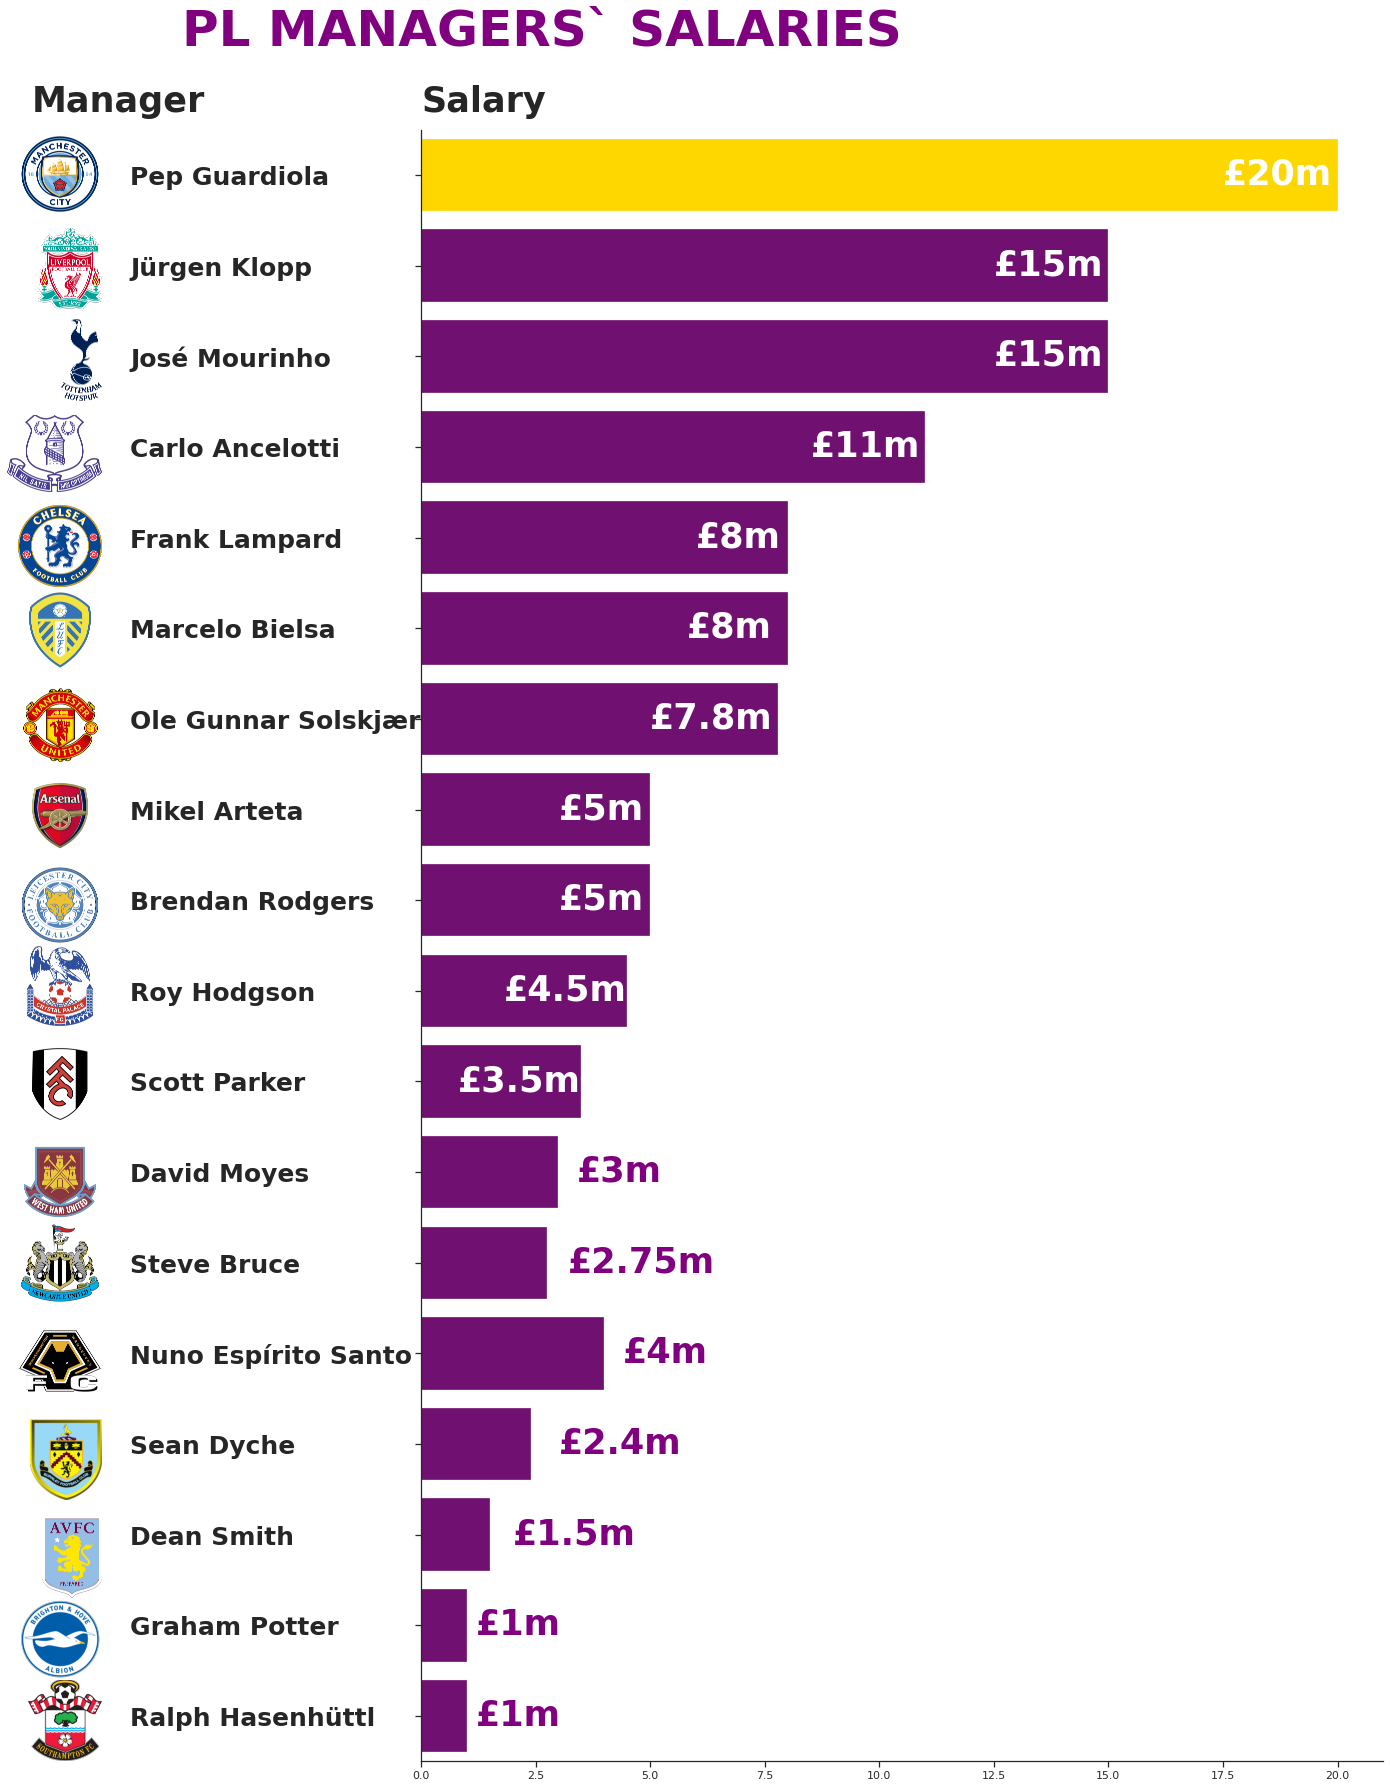

In [ ]:
from re import X

plt.rcParams["figure.figsize"] = [20, 25]
plt.rcParams["figure.autolayout"] = True
sns.set_style('ticks')
ax = sns.barplot(data = df1, x = 'Base Salary', y= "Manager", color= 'purple', linewidth= 0.3,)
ax.set_yticklabels(ax.get_yticklabels(), ha="left", rotation_mode = "anchor", fontweight = 'bold')
ax.tick_params(axis='y', which='major', pad=285)
ax.set_title('PL MANAGERS` SALARIES', size = float(50.0), fontweight = 'bold', ha='right', color= 'purple', pad = 85)
plt.text(-8.5, -0.7, "Manager", size = float(35.0), fontweight = 'bold')
plt.text(0, -0.7, "Salary", size = float(35.0), fontweight = 'bold')
ax.set_ylabel("")
ax.set_xlabel("" )
patch_h = [patch.get_height() for patch in ax.patches]   
idx_tallest = np.argmax(patch_h)   
ax.patches[idx_tallest].set_facecolor('gold')
ax.yaxis.set_tick_params(labelsize=25) 


plt.text(17.5, 0.1, "£20m", size = float(35.0), fontweight = 'bold', color = "white")
plt.text(12.5, 1.1, "£15m", size = float(35.0), fontweight = 'bold', color ='white')
plt.text(12.5, 2.1, "£15m", size = float(35.0), fontweight = 'bold', color ='white')
plt.text(8.5, 3.1, "£11m", size = float(35.0), fontweight = 'bold', color ='white')
plt.text(6, 4.1, "£8m", size = float(35.0), fontweight = 'bold', color ='white')
plt.text(5.8, 5.1, "£8m", size = float(35.0), fontweight = 'bold', color ='white')
plt.text(5, 6.1, "£7.8m", size = float(35.0), fontweight = 'bold', color ='white')
plt.text(3, 7.1, "£5m", size = float(35.0), fontweight = 'bold', color ='white')
plt.text(3, 8.1, "£5m", size = float(35.0), fontweight = 'bold', color ='white')
plt.text(1.8, 9.1, "£4.5m", size = float(35.0), fontweight = 'bold', color ='white')
plt.text(0.8, 10.1, "£3.5m", size = float(35.0), fontweight = 'bold', color ='white')
plt.text(3.4, 11.1, "£3m", size = float(35.0), fontweight = 'bold', color ='purple')
plt.text(3.2, 12.1, "£2.75m", size = float(35.0), fontweight = 'bold', color ='purple')
plt.text(4.4, 13.1, "£4m", size = float(35.0), fontweight = 'bold', color ='purple')
plt.text(3, 14.1, "£2.4m", size = float(35.0), fontweight = 'bold', color ='purple')
plt.text(2, 15.1, "£1.5m", size = float(35.0), fontweight = 'bold', color ='purple')
plt.text(1.2, 16.1, "£1m", size = float(35.0), fontweight = 'bold', color ='purple')
plt.text(1.2, 17.1, "£1m", size = float(35.0), fontweight = 'bold', color ='purple')

arr_lena1 = plt.imread(f"https://cdn.freebiesupply.com/images/large/2x/manchester-city-logo-png-transparent.png")
axin = ax.inset_axes([-0.43,0.948,0.098,0.05], anchor='NE', zorder=1)    
axin.imshow(arr_lena1)
axin.axis('off')


arr_lena2 = plt.imread(f"https://cdn.freebiesupply.com/logos/large/2x/liverpool-fc-4-logo-png-transparent.png")
axin = ax.inset_axes([-0.43,0.890,0.098,0.05], anchor='NE', zorder=1)    
axin.imshow(arr_lena2)  
axin.axis('OFF')

arr_lena3 = plt.imread(f"https://cdn.freebiesupply.com/logos/large/2x/tottenham-hotspur-logo-png-transparent.png")
axin = ax.inset_axes([-0.43,0.834,0.098,0.05], anchor='NE', zorder=1)    
axin.imshow(arr_lena3)  
axin.axis('OFF')

arr_lena4 = plt.imread(f"https://cdn.freebiesupply.com/logos/large/2x/chelsea-fc-2-logo-png-transparent.png")
axin = ax.inset_axes([-0.43,0.720,0.098,0.05], anchor='NE', zorder=1)    
axin.imshow(arr_lena4)  
axin.axis('OFF')

arr_lena5 = plt.imread(f"https://cdn.freebiesupply.com/logos/large/2x/leeds-united-afc-3-logo-png-transparent.png")
axin = ax.inset_axes([-0.43,0.668,0.098,0.05], anchor='NE', zorder=1)    
axin.imshow(arr_lena5)  
axin.axis('OFF')

arr_lena6 = plt.imread(f"https://cdn.freebiesupply.com/images/large/2x/manchester-united-logo-png-transparent.png")
axin = ax.inset_axes([-0.43,0.610,0.098,0.05], anchor='NE', zorder=1)    
axin.imshow(arr_lena6)  
axin.axis('OFF')

arr_lena7 = plt.imread(f"https://www.freepnglogos.com/uploads/arsenal-logo-png/arsenal-logo-symbol-arsenal-stl-model-grb-stl-arsenal-21.png")
axin = ax.inset_axes([-0.43,0.555,0.098,0.05], anchor='NE', zorder=1)    
axin.imshow(arr_lena7)  
axin.axis('OFF')

arr_lena8 = plt.imread(f"https://cdn.freebiesupply.com/logos/large/2x/leicester-city-fc-logo-png-transparent.png")
axin = ax.inset_axes([-0.43,0.500,0.098,0.05], anchor='NE', zorder=1)    
axin.imshow(arr_lena8)  
axin.axis('OFF')

arr_lena9 = plt.imread(f"https://cdn.freebiesupply.com/logos/large/2x/crystal-palace-fc-7937-logo-png-transparent.png")
axin = ax.inset_axes([-0.43,0.450,0.098,0.05], anchor='NE', zorder=1)    
axin.imshow(arr_lena9)  
axin.axis('OFF')

arr_lena10 = plt.imread(f"https://cdn.freebiesupply.com/logos/large/2x/fulham-fc-1-logo-png-transparent.png")
axin = ax.inset_axes([-0.43,0.390,0.098,0.05], anchor='NE', zorder=1)    
axin.imshow(arr_lena10)  
axin.axis('OFF')

arr_lena11 = plt.imread(f"https://cdn.freebiesupply.com/logos/large/2x/west-ham-united-fc-1-logo-png-transparent.png")
axin = ax.inset_axes([-0.43,0.330,0.098,0.05], anchor='NE', zorder=1)    
axin.imshow(arr_lena11)  
axin.axis('OFF')

arr_lena12 = plt.imread(f"https://cdn.freebiesupply.com/logos/large/2x/newcastle-united-logo-png-transparent.png")
axin = ax.inset_axes([-0.43,0.280,0.098,0.05], anchor='NE', zorder=1)    
axin.imshow(arr_lena12)  
axin.axis('OFF')

arr_lena13 = plt.imread(f"https://cdn.freebiesupply.com/logos/large/2x/wolverhampton-wanderers-fc-logo-png-transparent.png")
axin = ax.inset_axes([-0.43,0.220,0.098,0.05], anchor='NE', zorder=1)    
axin.imshow(arr_lena13)  
axin.axis('OFF')

arr_lena14 = plt.imread(f"https://cdn.freebiesupply.com/logos/large/2x/aston-villa-logo-png-transparent.png")
axin = ax.inset_axes([-0.43,0.100,0.098,0.05], anchor='NE', zorder=1)    
axin.imshow(arr_lena14)  
axin.axis('OFF')

arr_lena13 = plt.imread(f"https://upload.wikimedia.org/wikipedia/en/thumb/6/62/Burnley_F.C._Logo.svg/300px-Burnley_F.C._Logo.svg.png")
axin = ax.inset_axes([-0.43,0.160,0.098,0.05], anchor='NE', zorder=1)    
axin.imshow(arr_lena13)  
axin.axis('OFF')

arr_lena14 = plt.imread(f"https://cdn.freebiesupply.com/logos/large/2x/everton-logo-png-transparent.png")
axin = ax.inset_axes([-0.43,0.775,0.098,0.05], anchor='NE', zorder=1)    
axin.imshow(arr_lena14)  
axin.axis('OFF')

arr_lena15 = plt.imread(f"https://upload.wikimedia.org/wikipedia/en/thumb/f/fd/Brighton_%26_Hove_Albion_logo.svg/1200px-Brighton_%26_Hove_Albion_logo.svg.png")
axin = ax.inset_axes([-0.43,0.050,0.098,0.05], anchor='NE', zorder=1)    
axin.imshow(arr_lena15)  
axin.axis('OFF')

arr_lena16 = plt.imread(f"https://upload.wikimedia.org/wikipedia/en/thumb/c/c9/FC_Southampton.svg/1200px-FC_Southampton.svg.png")
axin = ax.inset_axes([-0.43,0.0,0.098,0.05], anchor='NE', zorder=1)    
axin.imshow(arr_lena16)  
axin.axis('OFF')

sns.despine()
plt.show()

It is looking more like a final product now.

I tried to put the border in each bars and color those as presented in the master  but I think it would be very difficult to do so and would require lots of time to do so.